In [17]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [18]:
import numpy as np
import pandas as pd 


In [19]:
df = pd.read_csv("Groceries_dataset.csv") 
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [21]:
df['itemDescription'].value_counts().head()

itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
Name: count, dtype: int64

In [23]:
member_shopping_frequency = df.groupby('Member_number')['Date'].count().sort_values(ascending=False)
print(member_shopping_frequency)

Member_number
3180    36
3737    33
3050    33
2051    33
3915    31
        ..
3533     2
2302     2
4824     2
1084     2
3377     2
Name: Date, Length: 3898, dtype: int64


In [24]:
items = df.groupby('itemDescription').size().reset_index(name='frequancy_of_item').sort_values(by='frequancy_of_item',ascending=False)
items

,itemDescription,frequancy_of_item
164,whole milk,2502
102,other vegetables,1898
122,rolls/buns,1716
138,soda,1514
165,yogurt,1334
...,...,...
124,rubbing alcohol,5
5,bags,4
4,baby cosmetics,3
114,preservation products,1


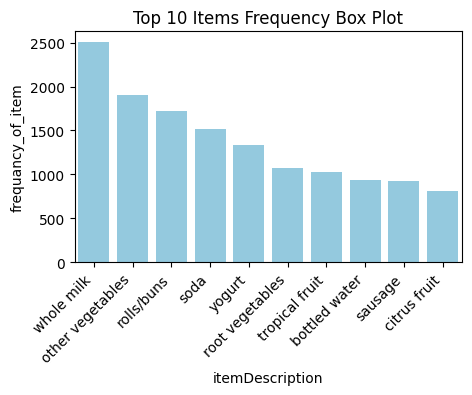

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
top_items = items.head(10)

plt.figure(figsize=(5, 3))
sns.barplot(x='itemDescription', y='frequancy_of_item', data=top_items, order=top_items['itemDescription'],color='skyblue')
plt.xticks(rotation=45, ha='right') 
plt.title('Top 10 Items Frequency Box Plot')
plt.show()

In [30]:
group_same_customer = df.sort_values(by = 'Member_number',ascending = True)
group_same_customer['itemDescription'].str.strip()

1629                    soda
13331             whole milk
8395              whole milk
4843                 sausage
17778     pickled vegetables
                ...         
34885    semi-finished bread
25489       other vegetables
9340            bottled beer
27877                 onions
3578                    soda
Name: itemDescription, Length: 38765, dtype: object

In [31]:
transactions_list = []
for _, group in group_same_customer.groupby('Member_number'):
    customer_purchases = group['itemDescription'].tolist()
    transactions_list.append(customer_purchases)

In [33]:
from apyori import apriori

association_rules = apriori(transactions_list, min_support=0.001, min_confidence=0.05, min_lift=4, min_length=2,max_length = 2)
rules_list = list(association_rules)
rules_list

[RelationRecord(items=frozenset({'soups', 'Instant food products'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'soups'}), confidence=0.06666666666666667, lift=5.413888888888889), OrderedStatistic(items_base=frozenset({'soups'}), items_add=frozenset({'Instant food products'}), confidence=0.08333333333333333, lift=5.413888888888889)]),
 RelationRecord(items=frozenset({'soft cheese', 'canned fruit'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'soft cheese'}), confidence=0.19047619047619047, lift=5.050858438613541)]),
 RelationRecord(items=frozenset({'rum', 'canned vegetables'}), support=0.001026167265264238, ordered_statistics=[OrderedStatistic(items_base=frozenset({'rum'}), items_add=frozenset({'canned vegetables'}), confidence=0.125, lift=6.090625)]),
 RelationRecord(items=frozenset({'cat food', 'tea'}), supp

In [34]:
def apriori_df(results):
    extracted_data = []

    for result in results:
        items_base = tuple(result.ordered_statistics[0].items_base)[0]
        items_add = tuple(result.ordered_statistics[0].items_add)[0]
        support = result.support
        confidence = result.ordered_statistics[0].confidence
        lift = result.ordered_statistics[0].lift

        extracted_data.append((items_base, items_add, support, confidence, lift))

    return extracted_data

resultsinDataFrame = pd.DataFrame(apriori_df(rules_list), columns = ['antecedent', 'consequent', 'Support', 'Confidence', 'Lift'])
resultsinDataFrame

,antecedent,consequent,Support,Confidence,Lift
0,Instant food products,soups,0.001026,0.066667,5.413889
1,canned fruit,soft cheese,0.001026,0.190476,5.050858
2,rum,canned vegetables,0.001026,0.125000,6.090625
3,tea,cat food,0.001796,0.259259,5.909898
4,ready soups,chewing gum,0.001026,0.266667,5.973946
5,cookware,ice cream,0.001026,0.235294,4.168984
6,curd cheese,mustard,0.001283,0.108696,4.655996
7,decalcifier,dessert,0.001026,0.444444,5.140785
8,dental care,seasonal products,0.001026,0.121212,4.678068
9,dog food,frozen potato products,0.001283,0.074627,4.040216


In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_) 
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


the code is converting a list of transactions into a one-hot encoded DataFrame, where each row represents a transaction, each column represents an item, and the cells contain True or False based on whether an item is present in a particular transaction. This format is commonly used for association rule mining algorithms, such as Apriori.







In [11]:
from mlxtend.frequent_patterns import fpgrowth 

fpgrowth(df, min_support=0.001)

,support,itemsets
0,0.157923,(164)
1,0.085879,(165)
2,0.060349,(130)
3,0.009490,(132)
4,0.051728,(105)
...,...,...
745,0.001403,"(26, 165)"
746,0.001069,"(26, 102)"
747,0.001002,"(26, 138)"
748,0.001069,"(104, 164)"


# Fpgrowth Algorithm

In [12]:
fpgrowth(df, min_support=0.01, use_colnames=True)

,support,itemsets
0,0.157923,(whole milk)
1,0.085879,(yogurt)
2,0.060349,(sausage)
3,0.051728,(pastry)
4,0.018780,(salty snack)
...,...,...
64,0.011161,"(yogurt, whole milk)"
65,0.011629,"(whole milk, soda)"
66,0.013968,"(whole milk, rolls/buns)"
67,0.010559,"(rolls/buns, other vegetables)"


# Apriori and Fpgrowth Algorithm Comparison

In [35]:
import pandas as pd
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [36]:
%timeit -n 100 -r 10 apriori(df, min_support=0.01)

175 ns ± 26.9 ns per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [37]:
%timeit -n 100 -r 10 fpgrowth(df, min_support=0.01)

78.2 ms ± 325 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


After trying to compare the speed of apriori and fpgrowth on the groceries dataset, it can be concluded that apriori is faster than fpgrowth.